In [1]:
import pandas 

g = pandas.read_csv('growth.csv', sep='\t')
g

,t,OD600
0,0,0.020000
1,12000,0.348954
2,15300,0.757353
3,18000,1.144506
4,19200,1.547964
5,22200,2.288233
6,25200,3.045034
7,28500,3.453444
8,32700,3.815483


In [2]:
x = g['t'].to_numpy()
y = g['OD600'].to_numpy()

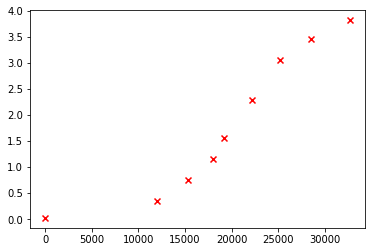

In [3]:
import matplotlib.pyplot as pp 

pp.scatter(x, y, marker='x', color='r')

In [4]:
from scipy.optimize import curve_fit
import numpy

def f_exp(x, a, b, c):
    return a * numpy.exp(b*x) + c

popt, pcov = curve_fit(f=f_exp, xdata=x, ydata=y, p0=(0.01, 0.0002, 2))
print(popt)
print(pcov)

[ 1.44441377e+00  4.30763352e-05 -1.72780096e+00]
[[ 1.60041127e+00 -2.48865005e-05 -1.95501429e+00]
 [-2.48865005e-05  3.92163798e-10  2.99884357e-05]
 [-1.95501429e+00  2.99884357e-05  2.43737589e+00]]


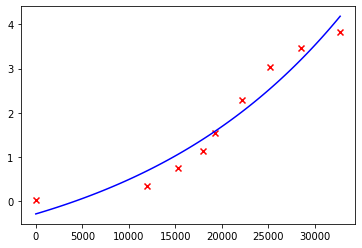

In [22]:
xp = numpy.linspace(x[0], x[-1], 100)
yp = f_exp(xp, *popt)
pp.plot(xp, yp, color='b')
pp.scatter(x, y, marker='x', color='r')

<ipython-input-9-474c08494452>:2: RuntimeWarning: divide by zero encountered in power
  return (a - b) / (1 + (x / c)**b) + d
<ipython-input-9-474c08494452>:2: RuntimeWarning: invalid value encountered in power
  return (a - b) / (1 + (x / c)**b) + d


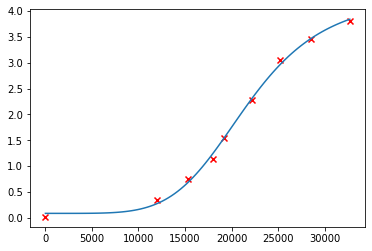

In [9]:
def f_logistic(x, a, b, c, d):
    return (a - b) / (1 + (x / c)**b) + d

popt, pcov =curve_fit(f=f_logistic, xdata=x, ydata=y, p0=(4, 0.02, 3, 1))
xp = numpy.linspace(x[0], x[-1], 100)
yp = f_logistic(xp, *popt)
pp.plot(xp, yp)
pp.scatter(x, y, marker='x', color='r')